Saturation curves for SM-omics and ST<br>

Input files are generated by counting number of unique molecules and number of annotated reads per annotated region after adjusting for sequencing depth, in downsampled fastq files (proportions 0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1) processed using ST-pipeline.<br>


In [1]:
%matplotlib inline
import os
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glob
import warnings
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
warnings.filterwarnings('ignore')

In [2]:
def condition(row):
    """ Takes row in pandas df as input and returns type of condition
    """
    # The samples are run in triplicate based on condition
    condition = ['sm-omics', 'ST']

    if row['Name'] in ['10015CN45_C2', '10015CN45_D2', '10015CN45_E2']:
        return condition[0]
        
    elif row['Name'] in ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1']:
        return condition[1]

In [3]:
# Load input files
path = '../../smomics_data'

stats_list = []

samples_list = ['10015CN45_C1', '10015CN45_D1', '10015CN45_E1', '10015CN45_C2', '10015CN45_D2', '10015CN45_E2']
    
prop_list = [0.001, 0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]
    
for filename in samples_list:
    
    cond_file = pd.read_csv(os.path.join(path, filename + '_umi_after_seq_depth_in_spots_under_outside_tissue.txt'), sep = '\t')

    print(cond_file)
    
    cond_file.sort_values(by='Num reads', inplace=True)
    cond_file['Prop_annot_reads'] = prop_list
    
    cond_file['Condition'] = cond_file.apply(lambda row: condition(row), axis = 1)
    cond_file['norm uniq mol inside'] = cond_file['UMI inside'] 
    cond_file['norm uniq mol outside'] = cond_file['UMI outside'] 

    stats_list.append(cond_file)

# Concat all files
cond_merge = pd.concat(stats_list)
    

           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN45_C1  1174.257764   540.091971      1009444    3556812
1  10015CN45_C1     0.140625     0.231379         4481      15843
2  10015CN45_C1  2475.481366  1112.353285      2020560    7115574
3  10015CN45_C1   488.655280   231.483212       505358    1777431
4  10015CN45_C1  3679.608696  1626.702190      3033669   10674337
5  10015CN45_C1   172.872671    84.753285       252395     887740
6  10015CN45_C1  5832.822981  2525.249635      5054571   17791861
7  10015CN45_C1  4791.406832  2091.661314      4044432   14233099
8  10015CN45_C1     9.167702     5.513158        49934     175988
           Name   UMI inside  UMI outside  Annot reads  Num reads
0  10015CN45_D1   256.621701   122.745865       329243    1312457
1  10015CN45_D1     0.181009     0.215889         3964      15849
2  10015CN45_D1    80.636364    40.830330       164653     657604
3  10015CN45_D1   663.123167   311.243609       658521    2622162
4  10015CN

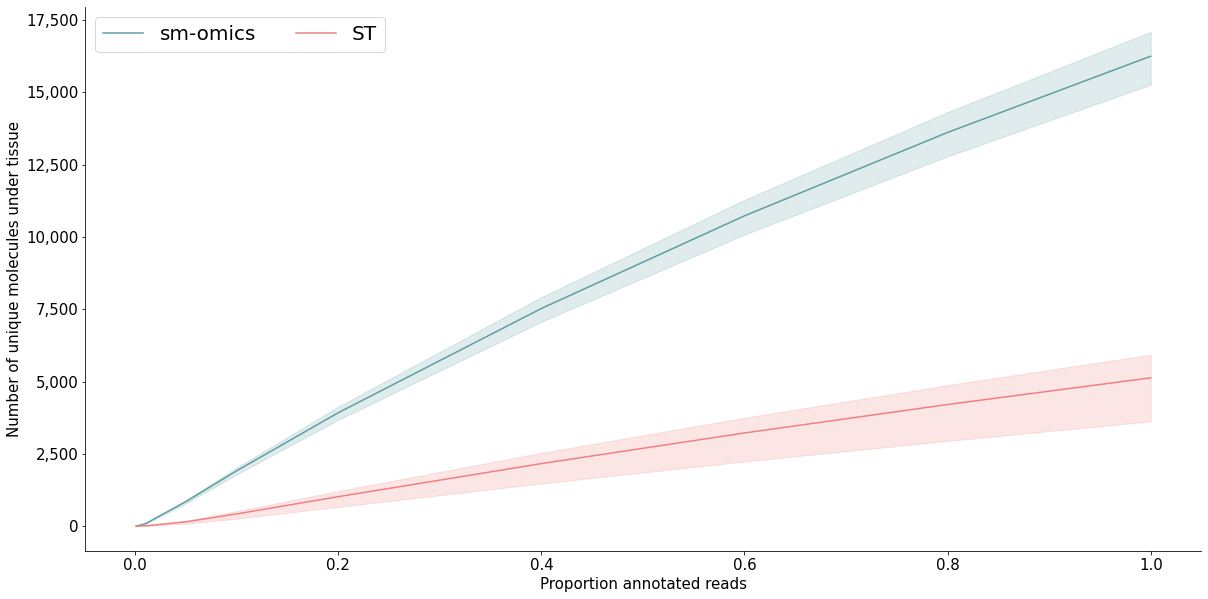

In [4]:
#Plot 
fig = plt.figure(figsize=(20, 10))
x="Prop_annot_reads"
y="norm uniq mol inside"
#y="Genes"
hue='Condition'

################ LINE PLOT

ax = sns.lineplot(x=x, y=y, data=cond_merge,hue=hue, 
                  palette =['cadetblue', 'lightcoral'], hue_order = ['sm-omics', 'ST'],ci=95)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

# X and y label size
ax.set_xlabel("Proportion annotated reads", fontsize=15)
ax.set_ylabel("Number of unique molecules under tissue", fontsize=15)

# Set ticks size
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# change background color
back_c = 'white'
ax.set_facecolor(back_c)
ax.grid(False)

# Thousand seprator on y axis
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# LEGEND
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=['sm-omics', 'ST'],loc='upper left', ncol=2, fontsize=20)


fig.set_size_inches(20, 10)
# plt.savefig("../../figures/saturation_sm_st_total_umis_inside_cancer.pdf", transparent=True, bbox_inches = 'tight',
#      pad_inches = 0, dpi=1200)
plt.show()

In [5]:
cond_file['Prop_annot_reads'] = 100*cond_file['Prop_annot_reads']

In [6]:
cond_merge.to_csv('../../smomics_data/sm_st_unique_molecules_under_outside_tissue_cancer.csv')